In [1067]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 20)

In [1068]:
df = pd.read_csv("E:\\ML\\DataSets\\adult.csv")

In [1069]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   object
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   object
 3   education       5000 non-null   object
 4   education_num   5000 non-null   object
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  income          5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB


In [1070]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1071]:
df.drop(["education"],axis=1,inplace=True)

In [1072]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,#NAME?,Private,245880,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [1073]:
df["relationship"].value_counts()

Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64

In [1074]:
df[df["relationship"]=="Husband"]["sex"].value_counts()

Male      1978
#NAME?      23
Name: sex, dtype: int64

In [1075]:
df.describe()

,capital_gain,capital_loss,hours_per_week
count,5000.000000,5000.000000,5000.000000
mean,1033.640200,93.696800,40.519000
std,7051.802077,410.801418,12.109193
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,40.000000
50%,0.000000,0.000000,40.000000
75%,0.000000,0.000000,45.000000
max,99999.000000,2547.000000,99.000000


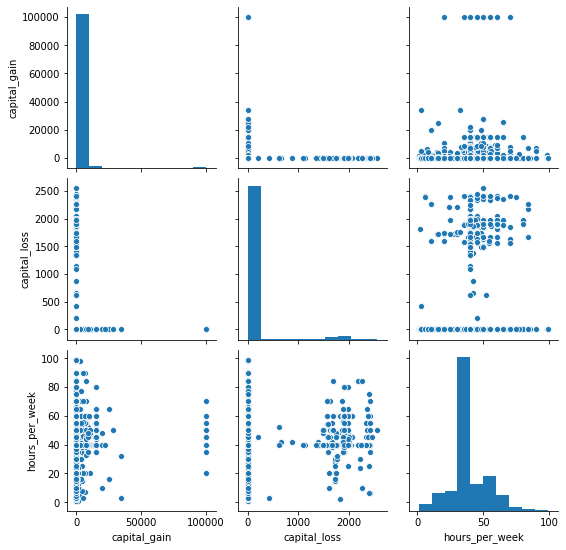

In [1076]:
sns.pairplot(df)   # Not needed for classification use cases

In [1077]:
df["age"].value_counts().sort_index()

#NAME?     48
17         60
18         76
19        109
20        128
         ... 
80          3
81          4
82          1
88          1
90          7
Name: age, Length: 69, dtype: int64

In [1078]:
df["workclass"].value_counts()  # Treat 331 records with ? where occupation also ?

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [1079]:
df[df["workclass"]=='?']

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,17,?,139183,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
4958,20,?,293136,10,Never-married,?,Own-child,White,Female,0,0,35,United-States,<=50K
4970,51,?,203953,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
4980,45,?,144354,5,Separated,?,Own-child,Black,Male,0,0,40,United-States,<=50K


In [1080]:
df.fnlwgt.value_counts().sort_index()

#NAME?    107
100029      1
100188      1
100219      1
100345      1
         ... 
99549       1
99697       1
99784       1
99835       1
99928       1
Name: fnlwgt, Length: 4507, dtype: int64

In [1081]:
df.education_num.value_counts().sort_index() # No duplicate category . Trea null(#NAME?)

#NAME?      57
1            7
10        1114
11         215
12         163
13         819
14         251
15          88
16          55
2           22
3           43
4           98
5           74
6          144
7          198
8           55
9         1597
Name: education_num, dtype: int64

In [1082]:
df.marital_status.value_counts() # No duplicate category . no null

Married-civ-spouse       2270
Never-married            1659
Divorced                  682
Widowed                   160
Separated                 158
Married-spouse-absent      66
Married-AF-spouse           5
Name: marital_status, dtype: int64

In [1083]:
df.occupation.value_counts() # Treat NULL (?) . No dup category

Prof-specialty       625
Craft-repair         619
Exec-managerial      618
Sales                588
Adm-clerical         576
Other-service        495
?                    331
Machine-op-inspct    312
Transport-moving     247
Handlers-cleaners    196
Farming-fishing      143
Tech-support         140
Protective-serv       90
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [1084]:
df.relationship.value_counts()# No duplicate category . no null

Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64

In [1085]:
df.race.value_counts()  # No duplicate category . Treat null

White                 4021
Black                  493
#NAME?                 264
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Other                   29
Name: race, dtype: int64

In [1086]:
df.sex.value_counts() # No duplicate category . Treat null

Male      3332
Female    1621
#NAME?      47
Name: sex, dtype: int64

In [1087]:
df.native_country.value_counts() # Treat NULL (?)

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
                 ... 
Thailand            2
Laos                2
Yugoslavia          2
Hong                1
Scotland            1
Name: native_country, Length: 40, dtype: int64

In [1088]:
df["capital_gain"].value_counts().sort_index() #  no null

0        4579
114         1
401         1
594         7
914         3
         ... 
25124       1
25236       1
27828       2
34095       2
99999      22
Name: capital_gain, Length: 83, dtype: int64

In [1089]:
df["capital_loss"].value_counts().sort_index()#  no null

0       4745
213        1
419        1
625        2
653        1
        ... 
2377       2
2392       4
2415      10
2444       1
2547       1
Name: capital_loss, Length: 55, dtype: int64

In [1090]:
df["hours_per_week"].value_counts().sort_index() #  no null

1      3
2      6
3      8
4      3
5     15
      ..
84    10
85     2
90     4
98     2
99     7
Name: hours_per_week, Length: 74, dtype: int64

In [1091]:
df["income"].value_counts().sort_index()

<=50K    3779
>50K     1221
Name: income, dtype: int64

# Step 1: Replace with NaN for different string type Null values

In [1092]:
df["age"].value_counts(dropna=False).sort_index()

#NAME?     48
17         60
18         76
19        109
20        128
         ... 
80          3
81          4
82          1
88          1
90          7
Name: age, Length: 69, dtype: int64

In [1093]:
df["age"].replace({"#NAME?":np.nan},inplace=True)

In [1094]:
df["age"].value_counts(dropna=False).sort_index()

17      60
18      76
19     109
20     128
21      98
      ... 
81       4
82       1
88       1
90       7
NaN     48
Name: age, Length: 69, dtype: int64

In [1095]:
df["workclass"].value_counts(dropna=False).sort_index()

?                    331
Federal-gov          146
Local-gov            329
Private             3435
Self-emp-inc         182
Self-emp-not-inc     383
State-gov            193
Without-pay            1
Name: workclass, dtype: int64

In [1096]:
df["workclass"].replace({"?":np.nan},inplace=True)

In [1097]:
df["workclass"].value_counts(dropna=False).sort_index()

Federal-gov          146
Local-gov            329
Private             3435
Self-emp-inc         182
Self-emp-not-inc     383
State-gov            193
Without-pay            1
NaN                  331
Name: workclass, dtype: int64

In [1098]:
df["fnlwgt"].value_counts(dropna=False).sort_index()

#NAME?    107
100029      1
100188      1
100219      1
100345      1
         ... 
99549       1
99697       1
99784       1
99835       1
99928       1
Name: fnlwgt, Length: 4507, dtype: int64

In [1099]:
df["fnlwgt"].replace({"#NAME?":np.nan},inplace=True)

In [1100]:
df["fnlwgt"].value_counts(dropna=False).sort_index()

100029      1
100188      1
100219      1
100345      1
100405      1
         ... 
99697       1
99784       1
99835       1
99928       1
NaN       107
Name: fnlwgt, Length: 4507, dtype: int64

In [1101]:
df["education_num"].value_counts(dropna=False).sort_index()

#NAME?      57
1            7
10        1114
11         215
12         163
13         819
14         251
15          88
16          55
2           22
3           43
4           98
5           74
6          144
7          198
8           55
9         1597
Name: education_num, dtype: int64

In [1102]:
df["education_num"].replace({"#NAME?":np.nan},inplace=True)

In [1103]:
df["education_num"].value_counts(dropna=False).sort_index()

1         7
10     1114
11      215
12      163
13      819
14      251
15       88
16       55
2        22
3        43
4        98
5        74
6       144
7       198
8        55
9      1597
NaN      57
Name: education_num, dtype: int64

In [1104]:
df["marital_status"].value_counts(dropna=False).sort_index()

Divorced                  682
Married-AF-spouse           5
Married-civ-spouse       2270
Married-spouse-absent      66
Never-married            1659
Separated                 158
Widowed                   160
Name: marital_status, dtype: int64

In [1105]:
df["occupation"].value_counts(dropna=False).sort_index()

?                    331
Adm-clerical         576
Armed-Forces           2
Craft-repair         619
Exec-managerial      618
Farming-fishing      143
Handlers-cleaners    196
Machine-op-inspct    312
Other-service        495
Priv-house-serv       18
Prof-specialty       625
Protective-serv       90
Sales                588
Tech-support         140
Transport-moving     247
Name: occupation, dtype: int64

In [1106]:
df["occupation"].replace({"?":np.nan},inplace=True)

In [1107]:
df["occupation"].value_counts(dropna=False).sort_index()

Adm-clerical         576
Armed-Forces           2
Craft-repair         619
Exec-managerial      618
Farming-fishing      143
Handlers-cleaners    196
Machine-op-inspct    312
Other-service        495
Priv-house-serv       18
Prof-specialty       625
Protective-serv       90
Sales                588
Tech-support         140
Transport-moving     247
NaN                  331
Name: occupation, dtype: int64

In [1108]:
df["relationship"].value_counts(dropna=False).sort_index()

Husband           2001
Not-in-family     1292
Other-relative     148
Own-child          770
Unmarried          544
Wife               245
Name: relationship, dtype: int64

In [1109]:
df["race"].value_counts(dropna=False).sort_index()

#NAME?                 264
Amer-Indian-Eskimo      48
Asian-Pac-Islander     145
Black                  493
Other                   29
White                 4021
Name: race, dtype: int64

In [1110]:
df["race"].replace({"#NAME?":np.nan},inplace=True)

In [1111]:
df["race"].value_counts(dropna=False).sort_index()

Amer-Indian-Eskimo      48
Asian-Pac-Islander     145
Black                  493
Other                   29
White                 4021
NaN                    264
Name: race, dtype: int64

In [1112]:
df["sex"].value_counts(dropna=False).sort_index()

#NAME?      47
Female    1621
Male      3332
Name: sex, dtype: int64

In [1113]:
df["sex"].replace({"#NAME?":np.nan},inplace=True)

In [1114]:
df["sex"].value_counts(dropna=False).sort_index()

Female    1621
Male      3332
NaN         47
Name: sex, dtype: int64

In [1115]:
df["native_country"].value_counts(dropna=False).sort_index()

?                    97
Cambodia              4
Canada               28
China                15
Columbia              5
                   ... 
Thailand              2
Trinadad&Tobago       4
United-States      4465
Vietnam              10
Yugoslavia            2
Name: native_country, Length: 40, dtype: int64

In [1116]:
df["native_country"].replace({"?":np.nan},inplace=True)

In [1117]:
df["native_country"].value_counts(dropna=False).sort_index()

Cambodia              4
Canada               28
China                15
Columbia              5
Cuba                 14
                   ... 
Trinadad&Tobago       4
United-States      4465
Vietnam              10
Yugoslavia            2
NaN                  97
Name: native_country, Length: 40, dtype: int64

In [1118]:
df["capital_gain"].value_counts(dropna=False).sort_index()

0        4579
114         1
401         1
594         7
914         3
         ... 
25124       1
25236       1
27828       2
34095       2
99999      22
Name: capital_gain, Length: 83, dtype: int64

In [1119]:
df["capital_loss"].value_counts(dropna=False).sort_index()

0       4745
213        1
419        1
625        2
653        1
        ... 
2377       2
2392       4
2415      10
2444       1
2547       1
Name: capital_loss, Length: 55, dtype: int64

In [1120]:
df["income"].value_counts(dropna=False).sort_index()

<=50K    3779
>50K     1221
Name: income, dtype: int64

# Step 2: Data Type Conversion

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4952 non-null   object
 1   workclass       4669 non-null   object
 2   fnlwgt          4893 non-null   object
 3   education_num   4943 non-null   object
 4   marital_status  5000 non-null   object
 5   occupation      4669 non-null   object
 6   relationship    5000 non-null   object
 7   race            4736 non-null   object
 8   sex             4953 non-null   object
 9   capital_gain    5000 non-null   int64 
 10  capital_loss    5000 non-null   int64 
 11  hours_per_week  5000 non-null   int64 
 12  native_country  4903 non-null   object
 13  income          5000 non-null   object
dtypes: int64(3), object(11)
memory usage: 547.0+ KB


In [1122]:
#Convert to Integer : Age,fnlwgt, education_num

In [1123]:
df["age"]= df[["age"]].astype(np.float)

In [1124]:
df["fnlwgt"]= df[["fnlwgt"]].astype(np.float)

In [1125]:
df["education_num"]= df[["education_num"]].astype(np.float)

In [1126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4952 non-null   float64
 1   workclass       4669 non-null   object 
 2   fnlwgt          4893 non-null   float64
 3   education_num   4943 non-null   float64
 4   marital_status  5000 non-null   object 
 5   occupation      4669 non-null   object 
 6   relationship    5000 non-null   object 
 7   race            4736 non-null   object 
 8   sex             4953 non-null   object 
 9   capital_gain    5000 non-null   int64  
 10  capital_loss    5000 non-null   int64  
 11  hours_per_week  5000 non-null   int64  
 12  native_country  4903 non-null   object 
 13  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 547.0+ KB


# Step 3 : Imputing

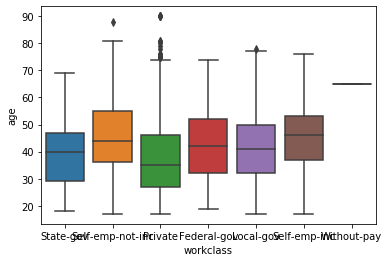

In [1127]:
sns.boxplot(x=df["workclass"],y=df["age"])

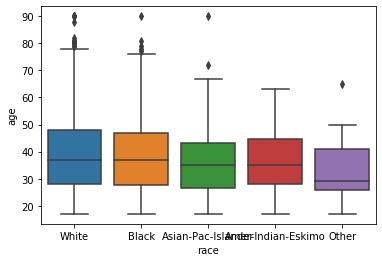

In [1128]:
sns.boxplot(x=df["race"],y=df["age"])

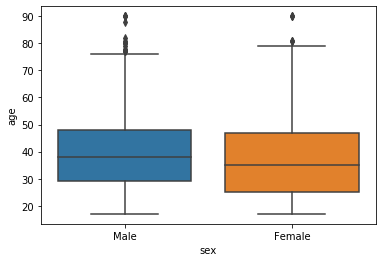

In [1129]:
sns.boxplot(x=df["sex"],y=df["age"])

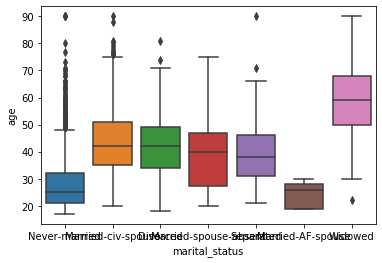

In [1130]:
sns.boxplot(x=df["marital_status"],y=df["age"])



In [1131]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

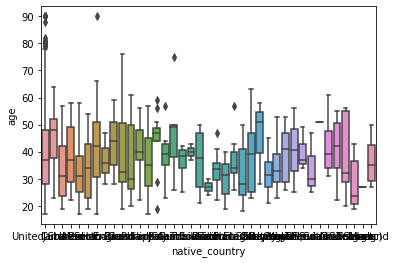

In [1132]:
sns.boxplot(x=df["native_country"],y=df["age"])

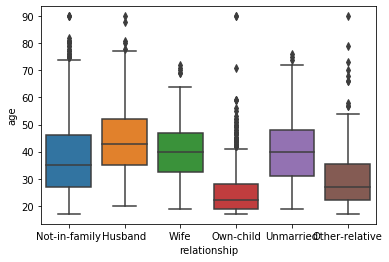

In [1133]:
sns.boxplot(x=df["relationship"],y=df["age"])

#Where outliers are almost equally distributed . Lets do age imputing by mean by relationship 
#provided we are not dropping outliers

In [1134]:
df["age"]=df.groupby("relationship")["age"].transform(lambda x:x.fillna(x.mean()))

In [1135]:
df["age"].isna().value_counts()

False    5000
Name: age, dtype: int64

In [1136]:
df["workclass"].replace({np.nan:"Others"},inplace=True)

In [1137]:
df["workclass"].isna().value_counts()

False    5000
Name: workclass, dtype: int64

In [1138]:
df["occupation"].replace({np.nan:"Others"},inplace=True)

In [1139]:
df["occupation"].isna().value_counts()

False    5000
Name: occupation, dtype: int64

In [1140]:
df["race"].fillna(df["race"].mode()[0],inplace=True)

In [1141]:
df["race"].isna().value_counts()

False    5000
Name: race, dtype: int64

In [1142]:
df["native_country"].fillna(df["native_country"].mode()[0],inplace=True)

In [1143]:
df["sex"]=df.groupby("relationship")["sex"].transform(lambda x:x.fillna(x.mode()[0]))

In [1144]:
df["education_num"]=df.groupby("workclass")["education_num"].transform(lambda x:x.fillna(x.mode()[0]))

In [1145]:
df["fnlwgt"]=df.groupby("age")["fnlwgt"].transform(lambda x:x.fillna(x.mean()))
# there is some relationship between age and fnlwgt

In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   workclass       5000 non-null   object 
 2   fnlwgt          5000 non-null   float64
 3   education_num   5000 non-null   float64
 4   marital_status  5000 non-null   object 
 5   occupation      5000 non-null   object 
 6   relationship    5000 non-null   object 
 7   race            5000 non-null   object 
 8   sex             5000 non-null   object 
 9   capital_gain    5000 non-null   int64  
 10  capital_loss    5000 non-null   int64  
 11  hours_per_week  5000 non-null   int64  
 12  native_country  5000 non-null   object 
 13  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 547.0+ KB


# Model Creation

In [1147]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [1148]:
Encodeddf = pd.get_dummies(df[["workclass","marital_status","occupation","relationship","race","sex","native_country"]])

In [1149]:
Enco_df = pd.concat([Encodeddf,df[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week","income"]]],axis=1)

In [1150]:
from sklearn.preprocessing import StandardScaler

In [1151]:
scaler = StandardScaler()

In [1152]:
scaled_features = scaler.fit_transform(Enco_df.drop("income",axis=1))

# Logistic Model

In [1200]:
from sklearn.model_selection import train_test_split

In [1201]:
X_train_LR,X_test_LR, y_train_LR,y_test_LR = train_test_split(scaled_features,Enco_df["income"],test_size=.2,random_state=101)

In [1202]:
from sklearn.linear_model import LogisticRegression

In [1203]:
log = LogisticRegression()

In [1204]:
log.fit(X_train_LR,y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1205]:
log.intercept_

array([-2.22353769])

In [1206]:
log.coef_

array([[ 0.14287845, -0.05453555, -0.05859875,  0.04605592,  0.07960363,
        -0.1310582 ,  0.01609575, -0.0336332 , -0.29194477, -0.13772277,
         0.83814357, -0.17090916, -0.53312016, -0.12512474, -0.1154729 ,
        -0.11617673, -0.08784641,  0.03946176,  0.26851699, -0.28049179,
        -0.05651255, -0.11634641, -0.17639608, -0.05859875, -0.20848268,
         0.17338069,  0.05343863,  0.07078191,  0.10418914, -0.00627228,
        -0.10447149,  0.21362186,  0.0148218 , -0.4712815 ,  0.19286884,
         0.30208263, -0.05978782,  0.11242893, -0.03877348, -0.14003058,
         0.02615529, -0.13217974,  0.13217974,  0.07657358,  0.0684881 ,
        -0.06578658, -0.21417855, -0.05834171, -0.16548587, -0.10072739,
        -0.09203806, -0.03467129,  0.02783132,  0.02633145, -0.07257459,
         0.03169064, -0.13490697, -0.01749936,  0.0122548 , -0.03509427,
         0.13213966, -0.1055499 ,  0.08822322,  0.05965597, -0.03883365,
        -0.11818946, -0.03335009, -0.15297683, -0.0

In [1207]:
predict_LR = log.predict(X_test_LR)

In [1208]:
print(accuracy_score(y_test_LR,predict_LR))

0.844


In [1209]:
print(confusion_matrix(y_test_LR,predict_LR))

[[705  50]
 [106 139]]


In [1210]:
print(classification_report(y_test_LR,predict_LR))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90       755
        >50K       0.74      0.57      0.64       245

    accuracy                           0.84      1000
   macro avg       0.80      0.75      0.77      1000
weighted avg       0.84      0.84      0.84      1000



# Decision Tree

In [1263]:
X_train_DT,X_test_DT, y_train_DT,y_test_DT = train_test_split(scaled_features,Enco_df["income"],test_size=.3,random_state=110)

In [1264]:
from sklearn.tree import DecisionTreeClassifier

In [1273]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_DT,y_train_DT)
y_pred_DT=dt.predict(X_test_DT)
print(accuracy_score(y_test_DT,y_pred_DT))


0.8453333333333334


In [1241]:
print(confusion_matrix(y_test_LR,predict_LR))

[[705  50]
 [106 139]]


# Random Forest

In [1291]:
X_train_RF,X_test_RF, y_train_RF,y_test_RF = train_test_split(scaled_features,Enco_df["income"],test_size=.2,random_state=110)

In [1292]:
from sklearn.ensemble import RandomForestClassifier

In [1299]:
rf = RandomForestClassifier(criterion='gini',n_estimators=200,)

In [1300]:
rf.fit(X_train_RF,y_train_RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1301]:
pred_rf = rf.predict(X_test_RF)

In [1302]:
print(confusion_matrix(y_test_RF,pred_rf))

[[700  52]
 [ 95 153]]


In [1303]:
print(classification_report(y_test_RF,pred_rf))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90       752
        >50K       0.75      0.62      0.68       248

    accuracy                           0.85      1000
   macro avg       0.81      0.77      0.79      1000
weighted avg       0.85      0.85      0.85      1000



# KNN Model

In [1153]:
from sklearn.model_selection import train_test_split

In [1172]:
X_train,X_test, y_train,y_test = train_test_split(scaled_features,Enco_df["income"],test_size=.1,random_state=101)

In [1173]:
from sklearn.neighbors import KNeighborsClassifier

In [1194]:
knn = KNeighborsClassifier(n_neighbors=8)

In [1195]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [1196]:
pred = knn.predict(X_test)

In [1212]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [1198]:
print(confusion_matrix(y_test,pred))

[[352  25]
 [ 57  66]]


In [1199]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90       377
        >50K       0.73      0.54      0.62       123

    accuracy                           0.84       500
   macro avg       0.79      0.74      0.76       500
weighted avg       0.83      0.84      0.83       500



In [1180]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

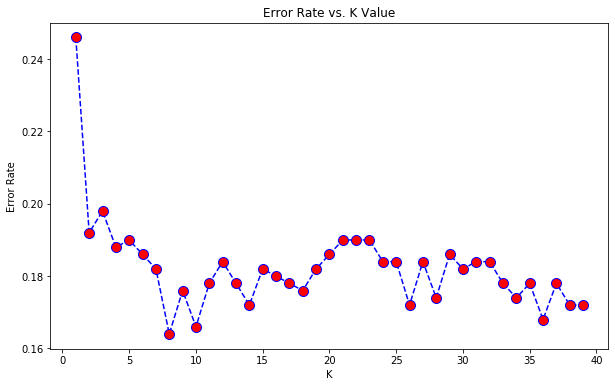

In [1181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')